**The Sparks Foundation -Data Science and Business Analytics Internship**

**Task 3 - Perform Exploratory Data Analysis on dataset "Indian Premier League".**

**Author: Prince Mathew**

**Batch- January 2022**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [ ]:
df1=pd.read_csv('/content/matches.csv')
df2=pd.read_csv('/content/deliveries.csv')

In [ ]:
df1.head(2)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [ ]:
df2.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
print("Number of Seasons:", df1['season'].nunique())
print("Seasons:",df1['season'].unique())
print("Number of matches played:", df1.index.nunique())

Number of Seasons: 12
Seasons: [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]
Number of matches played: 756


In [ ]:
df1.replace(['Rising Pune Supergiant'], ['Rising Pune Supergiants'],inplace=True)
df1.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DC'],inplace=True)

df2.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DC'],inplace=True)

print('Number of Teams:', df1['team1'].nunique())
print('Teams featured in the Tournament:\n',df1['team1'].unique() )

Number of Teams: 13
Teams featured in the Tournament:
 ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


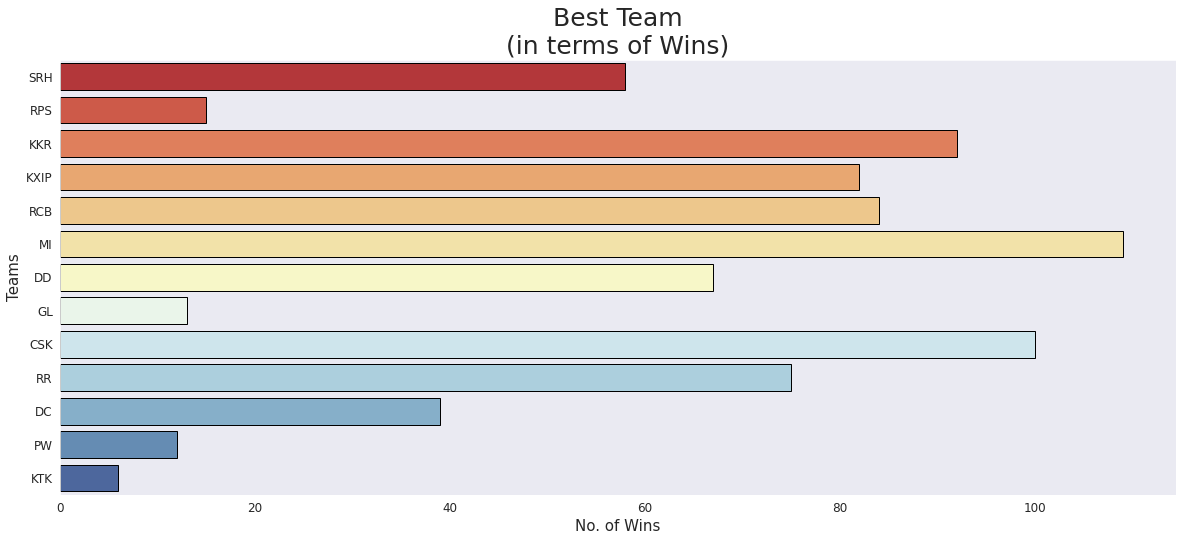

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(y=df1['winner'], palette='RdYlBu', edgecolor='black')
plt.title('Best Team\n(in terms of Wins)', size=25)
plt.ylabel('Teams', size=15)
plt.xlabel('No. of Wins', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

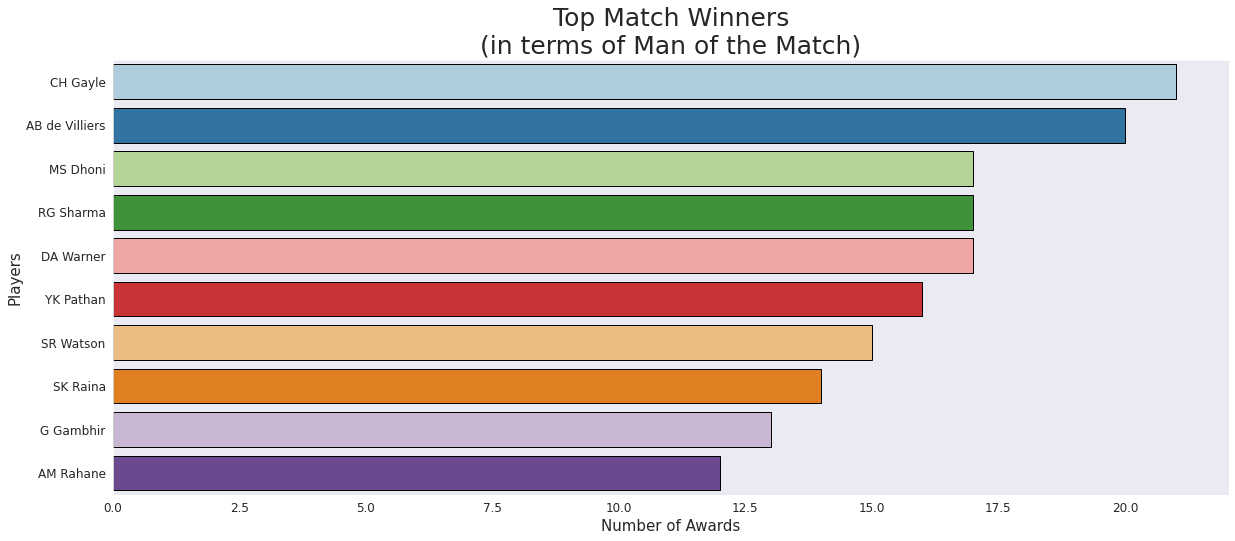

In [ ]:
player = df1['player_of_match'].value_counts().head(10).reset_index()
player.columns = ['Player', 'No. of Awards']

plt.figure(figsize=(20,8))
sns.barplot(y=player['Player'], x=player['No. of Awards'], palette='Paired', edgecolor='black')
plt.title('Top Match Winners\n(in terms of Man of the Match)', size=25)
plt.ylabel('Players', size=15)
plt.xlabel('Number of Awards', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

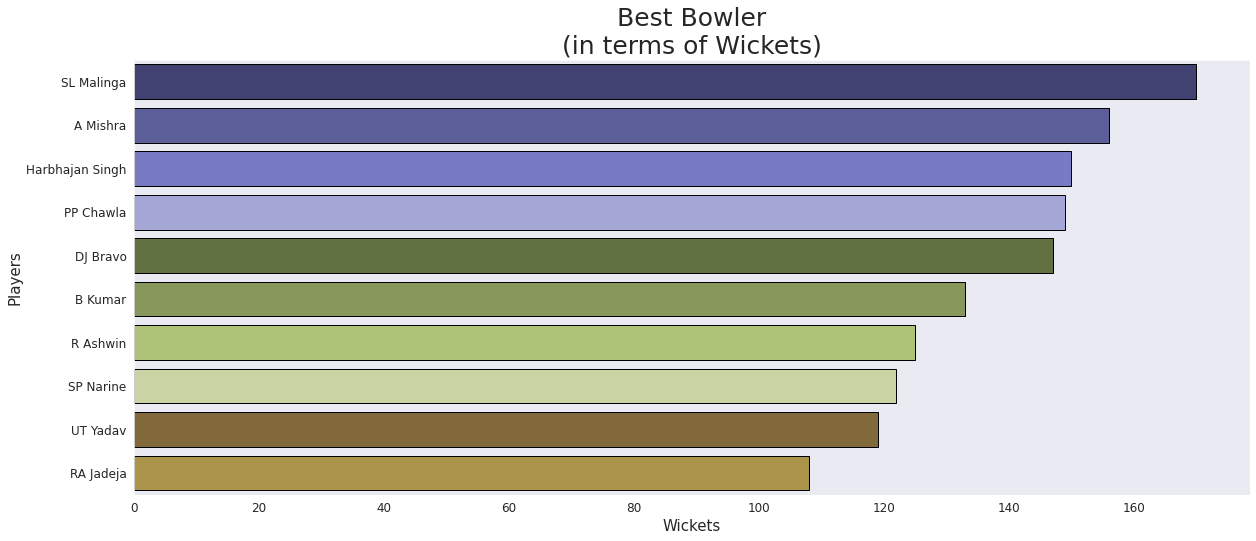

In [ ]:
dismissal = ['caught','bowled','caught and bowled','hit wicket','lbw','stumped']
best_bowler = df2.loc[df2['dismissal_kind'].isin(dismissal)]
best_bowler = best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns = ['bowler', 'wickets']

plt.figure(figsize=(20,8))
sns.barplot(y=best_bowler['bowler'], x=best_bowler['wickets'],palette='tab20b', edgecolor='black')
plt.title('Best Bowler\n(in terms of Wickets)', size=25)
plt.ylabel('Players', size=15)
plt.xlabel('Wickets', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

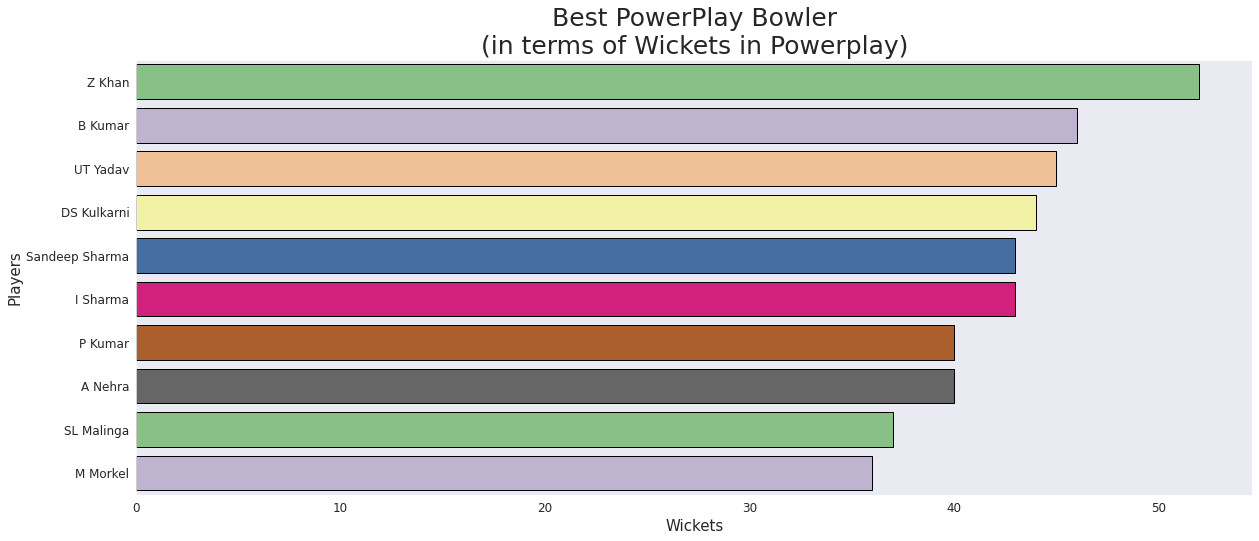

In [ ]:
powerplay = [1,2,3,4,5,6]
powerplay_bowler = df2[df2['dismissal_kind'].isin(dismissal) & df2['over'].isin(powerplay)]
powerplay_bowler = powerplay_bowler['bowler'].value_counts().reset_index().head(10)
powerplay_bowler.columns = ['bowler', 'wickets']

plt.figure(figsize=(20,8))
sns.barplot(y=powerplay_bowler['bowler'], x=powerplay_bowler['wickets'],palette='Accent',edgecolor='black')
plt.title('Best PowerPlay Bowler\n(in terms of Wickets in Powerplay)', size=25)
plt.ylabel('Players', size=15)
plt.xlabel('Wickets', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

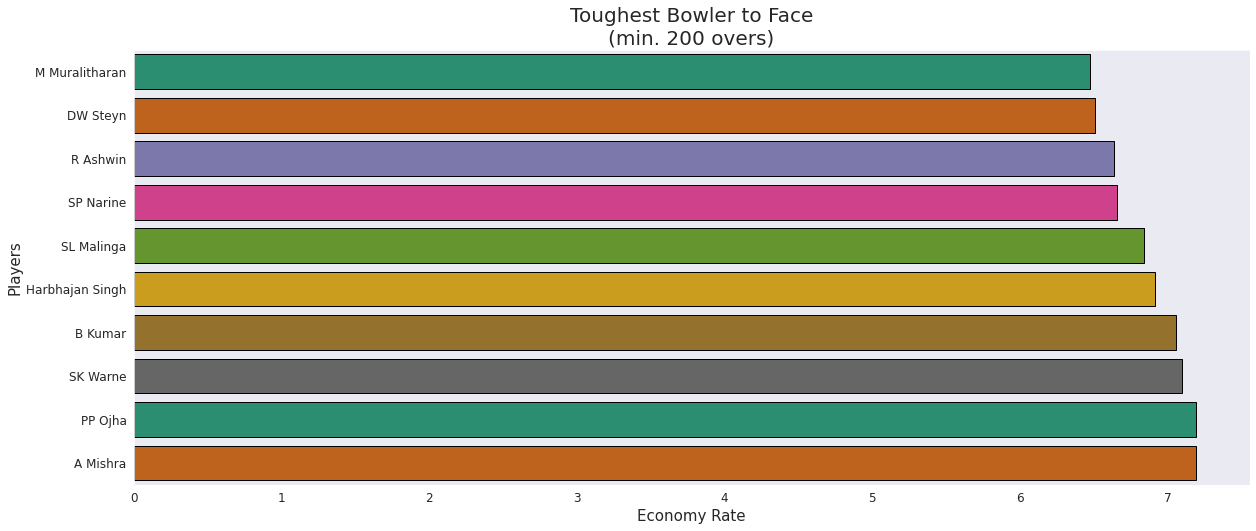

In [ ]:
economy=df2.groupby(['bowler']).sum()
economy['over'] = df2['bowler'].value_counts()/6
economy['runs'] = economy['wide_runs'] + economy['noball_runs'] + economy['batsman_runs']
economy = economy[economy['over'] >= 200]
economy['rate'] = economy['runs']/economy['over']
economy = economy.sort_values(by=['rate'], ascending=True).head(10)

plt.figure(figsize=(20,8))
sns.barplot(y=economy.index, x=economy['rate'], palette='Dark2',edgecolor='black')
plt.title('Toughest Bowler to Face\n(min. 200 overs)', size=20)
plt.ylabel('Players', size=15)
plt.xlabel('Economy Rate', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

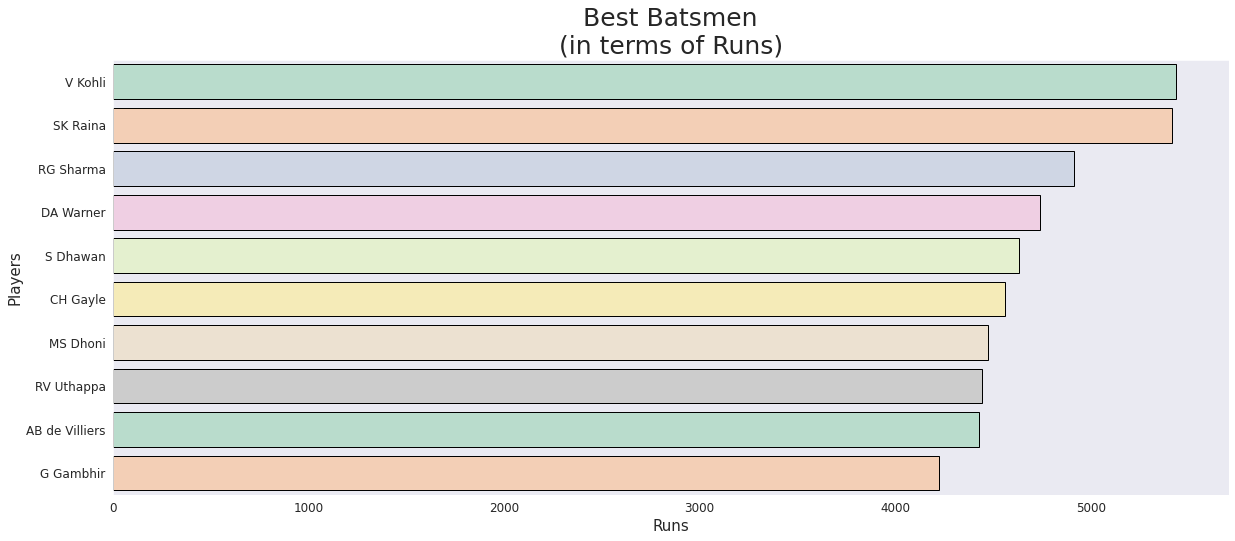

In [ ]:
best_batsman = df2.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman = best_batsman.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(20,8))
sns.barplot(y=best_batsman.index, x=best_batsman['batsman_runs'], palette='Pastel2',edgecolor='black')
plt.title('Best Batsmen\n(in terms of Runs)', size=25)
plt.ylabel('Players', size=15)
plt.xlabel('Runs', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

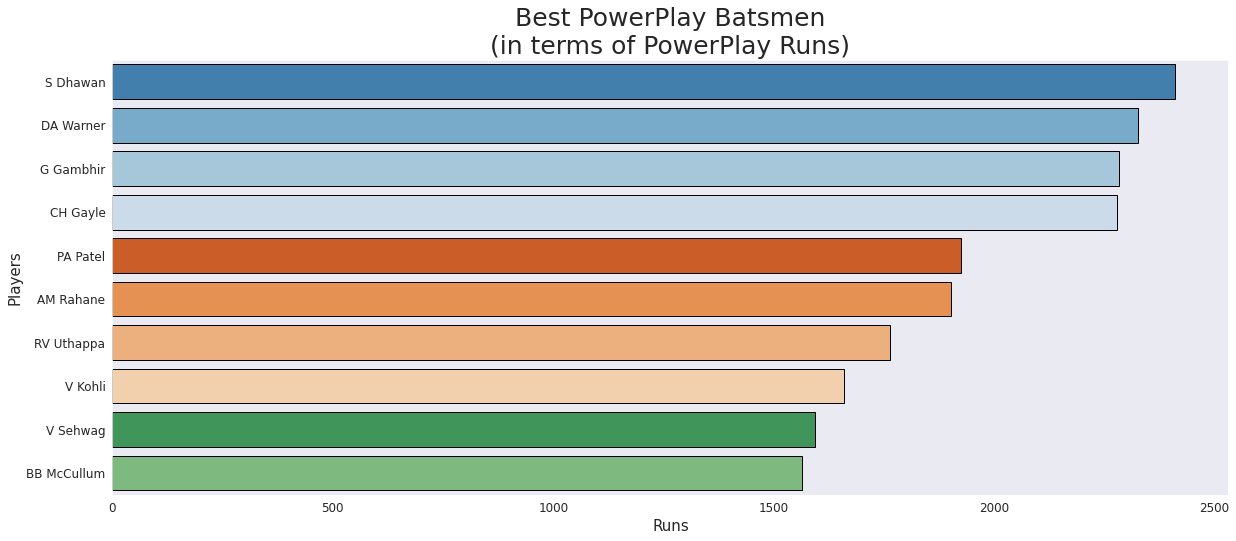

In [ ]:
powerplay_batsman = df2.loc[df2['over'].isin(powerplay)]
powerplay_batsman = powerplay_batsman.groupby(['batsman']).batsman_runs.sum().reset_index()
powerplay_batsman = powerplay_batsman.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(20,8))
sns.barplot(y=powerplay_batsman.index, x=powerplay_batsman['batsman_runs'], palette='tab20c',edgecolor='black')
plt.title('Best PowerPlay Batsmen\n(in terms of PowerPlay Runs)', size=25)
plt.ylabel('Players', size=15)
plt.xlabel('Runs', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

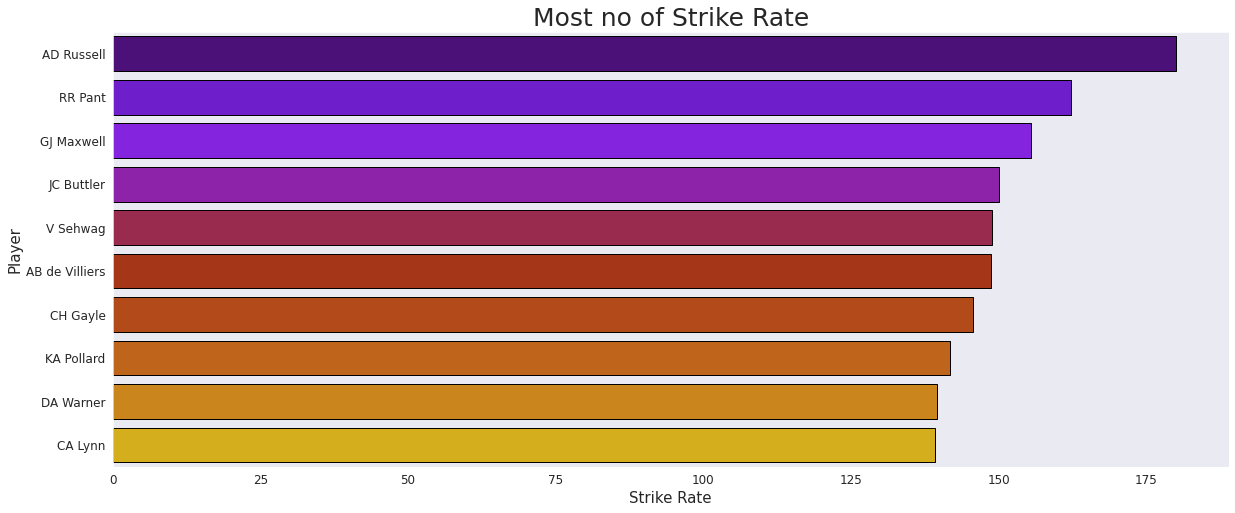

In [ ]:
strike_rate = df2.groupby(['batsman']).batsman_runs.sum().reset_index()
strike_rate['balls'] = df2.groupby(['batsman']).ball.count().reset_index()['ball']
strike_rate['rate'] = strike_rate['batsman_runs']/strike_rate['balls']*100
strike_rate = strike_rate[strike_rate['batsman_runs'] >= 1200].sort_values(by=['rate'], ascending=False).head(10)

plt.figure(figsize=(20,8))
sns.barplot(x=strike_rate['rate'], y=strike_rate['batsman'], palette='gnuplot', edgecolor='black')
plt.title('Most no of Strike Rate', size=25)
plt.ylabel('Player', size=15)
plt.xlabel('Strike Rate', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

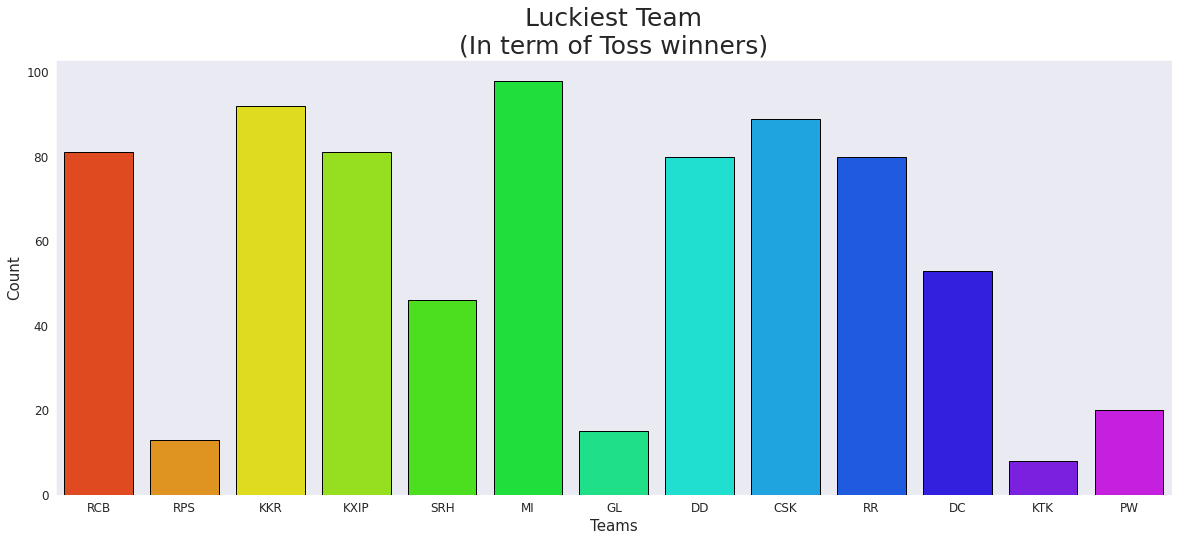

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=df1['toss_winner'], palette='gist_rainbow', edgecolor='black')
plt.title('Luckiest Team\n(In term of Toss winners)', size=25)
plt.ylabel('Count', size=15)
plt.xlabel('Teams', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

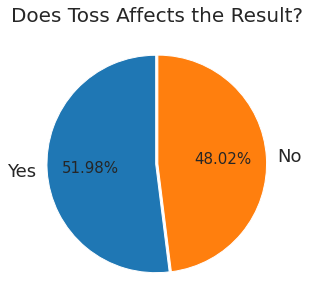

In [ ]:
toss = df1.loc[df1['toss_winner'] == df1['winner']]
data = [len(toss), len(df1)-len(toss)]
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(data, labels=['Yes', 'No'], startangle=90,explode=(.01,.01) ,autopct='%1.2f%%')
plt.title('Does Toss Affects the Result?',size=20)
plt.setp(texts, size=18)
plt.setp(autotexts, size=15)
plt.show()

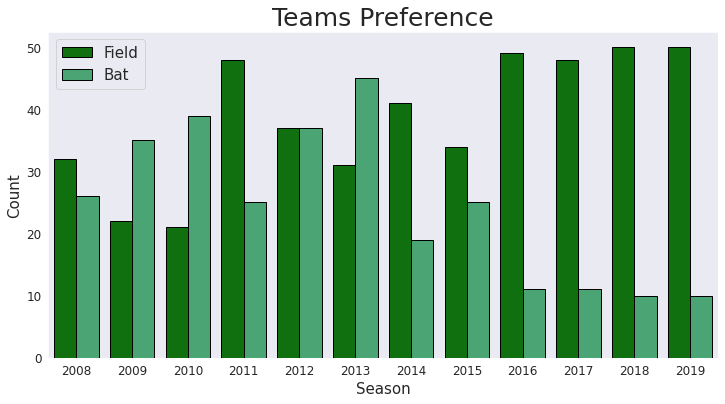

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df1['season'],hue=df1['toss_decision'] 
              ,palette=dict(field='green',bat='mediumseagreen'), edgecolor='black')
plt.title('Teams Preference', size=25)
plt.ylabel('Count', size=15)
plt.xlabel('Season', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(('Field', 'Bat'), prop={"size" :15})
plt.show()

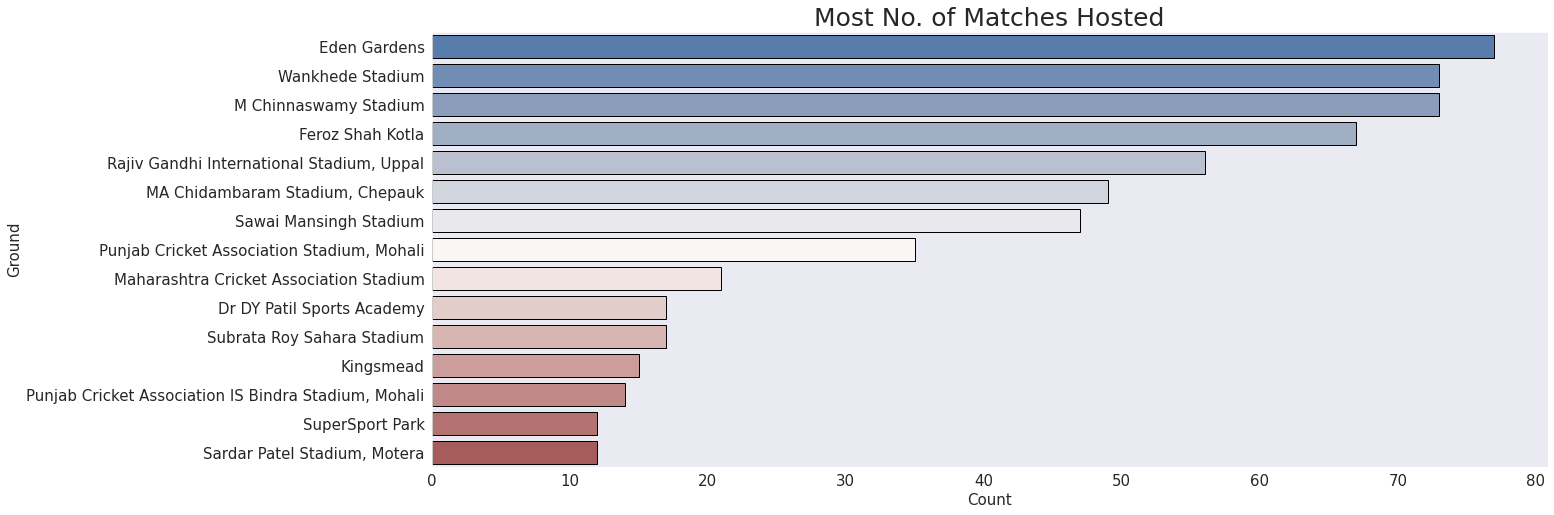

In [ ]:
venue = df1['venue'].value_counts().reset_index().head(15)
venue.columns = ['ground', 'Matches']

plt.figure(figsize=(20,8))
sns.barplot(x=venue['Matches'],y=venue['ground'],palette='vlag' ,edgecolor='black')
plt.title('Most No. of Matches Hosted', size=25)
plt.ylabel('Ground', size=15)
plt.xlabel('Count', size=15)
plt.yticks(size=15)
plt.xticks(size=15)
plt.show()

**Conclusion:**

1. Eden Garden Stadium has hosted most no. of matches followed by Wankhede Stadium and M Chinnaswamy stadium.
2. MI is the most luckiest team in term of toss winner followed by KKR and CSK respectively.
3. Winning the toss does not guarantee the winner, as both Teams stand equal chance of winning the match even after the toss.
4. Company should try to Sign Players from MI, CSK or KKR. As these are the most successful Teams in the League and they will have the most fan-following among the other teams
